In [1]:
# Kütüphaneler

import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.metrics import mean_squared_error , r2_score , confusion_matrix , accuracy_score , roc_auc_score , roc_curve , classification_report
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale , StandardScaler     # standardizasoyon işlemleri
from sklearn import model_selection
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression


from warnings import filterwarnings
filterwarnings("ignore")     # önceki bölümlerde çalıştırdığımızda çıkan gereksiz uyarı mesajları çıkmasın diye

In [2]:
df = pd.read_csv("Veri ve Fotoğraflar\diabetes.csv")
df.head()


# Bağımlı değişkenimiz "Outcome". Yani burada kişi diyabet hastası mı değil mi bunu inceliyoruz. 1, hasta ; 0, hasta değil

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
y = df["Outcome"]

x = df.drop(["Outcome"] , axis=1)

x_train , x_test , y_train , y_test = train_test_split(x , y , test_size=0.30 , random_state=42)

# MODEL

In [18]:
rf_model = RandomForestClassifier().fit(x_train , y_train)

# TAHMİN

In [19]:
y_pred = rf_model.predict(x_test)

accuracy_score(y_test , y_pred)

0.7359307359307359

# MODEL TUNING (DOĞRULAMA)

In [7]:
rf = RandomForestClassifier()

In [9]:
rf_params = {"n_estimators": [100,200,500,1000] , "max_features": [3,5,7,8] , "min_samples_split": [2,5,10,20]}

In [11]:
rf_cv_model = GridSearchCV(rf , rf_params , cv=10 , n_jobs=-1 , verbose=2).fit(x_train , y_train)

Fitting 10 folds for each of 64 candidates, totalling 640 fits


In [14]:
rf_cv_model.best_params_

{'max_features': 7, 'min_samples_split': 2, 'n_estimators': 200}

In [15]:
# Final modelimiz 

rf_tuned = RandomForestClassifier(max_features=7 , min_samples_split=2 , n_estimators=200).fit(x_train , y_train)

In [16]:
y_pred = rf_tuned.predict(x_test)

accuracy_score(y_test , y_pred)

0.7445887445887446

# DEĞİŞKEN ÖNEM DÜZEYİ

In [21]:
rf_tuned.feature_importances_

array([0.05619105, 0.34498574, 0.07383758, 0.05193453, 0.05259311,
       0.1673297 , 0.11050433, 0.14262396])

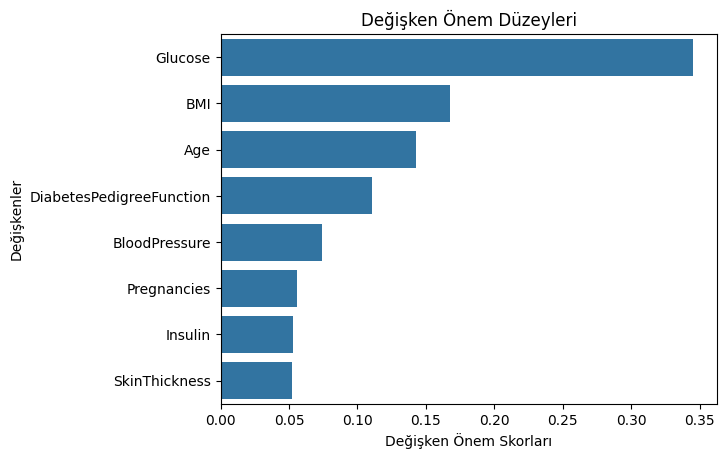

In [22]:
featue_imp = pd.Series(rf_tuned.feature_importances_ , index=x_train.columns).sort_values(ascending=False)

sns.barplot(x=featue_imp , y=featue_imp.index)
plt.xlabel("Değişken Önem Skorları")
plt.ylabel("Değişkenler")
plt.title("Değişken Önem Düzeyleri")
plt.show()